# Data Scraped from Express Entry Year-End Report (2015 - 2018)

Canadian Express Entry application management system was launched in January 2015. The year-end data 2019 is not available yet. I am interested in the most prevalent occupations among invitations issued by the Government of Canada in the past four years.

What National Occupational Classification (NOC), or which occupation category was invited most?

In [1]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

def ExtractTableData(url, table_no):
    page = urllib.request.urlopen(url)
    bs = BeautifulSoup(page)
    table = bs.findAll('table')[table_no]
    return table

def table_df(table):  
    rows = []
    trs = table.find_all('tr')
    headerow = [td.get_text(strip=True) for td in trs[0].find_all('th')] # header row
    if headerow: # if there is a header row include first
        rows.append(headerow)
        trs = trs[1:]
    for tr in trs: # for every table row
        rows.append([th.get_text(strip=True) for th in tr.find_all('th')] + [td.get_text(strip=True) for td in tr.find_all('td')])
    df = pd.DataFrame(rows[1:], columns = rows[0])
    return df

In [3]:
url2018 = 'https://www.canada.ca/en/immigration-refugees-citizenship/corporate/publications-manuals/express-entry-year-end-report-2018.html'
table_no2018 = 11
table_no2017 = 10

table2018 = ExtractTableData(url2018, table_no2018)
table2017 = ExtractTableData(url2018, table_no2017)

NOC2018 = table_df(table2018)[:10]
NOC2017 = table_df(table2017)[:10]

NOC2018['Occupation'] = NOC2018['Occupation'].apply(lambda x: 'NOC' + x.lower())
NOC2017['Occupation'] = NOC2017['Occupation'].apply(lambda x: 'NOC' + x.lower())

NOC2018['Year'] = 2018
del NOC2018['%']

NOC2017['Year'] = 2017
del NOC2017['%']


In [7]:
url2016 = 'https://www.canada.ca/en/immigration-refugees-citizenship/corporate/publications-manuals/express-entry-year-end-report-2016.html'
table_no2016 = 9
table_no2015 = 8

table2016 = ExtractTableData(url2016, table_no2016)
table2015 = ExtractTableData(url2016, table_no2015)

NOC2016 = table_df(table2016)[:10]
NOC2015 = table_df(table2015)[:10]

NOC2016['Occupation'] = NOC2016['Occupation'].apply(lambda x: x.split(' -')[0] + x.split(' -')[1].lower())
NOC2015['Occupation'][9] = 'NOC1112 - Financial and Investment Analysts'
NOC2015['Occupation'] = NOC2015['Occupation'].apply(lambda x: x.split(' -')[0] + x.split(' -')[1].lower())
#

NOC2016['Occupation'][1] = 'NOC2173 software engineers and designers' # in line with the updated NOC since 2017
NOC2015['Occupation'][3] = 'NOC2173 software engineers and designers'

NOC2016['Year'] = 2016
del NOC2016['%']

NOC2015['Year'] = 2015
del NOC2015['%']

NOC2015_2018 = pd.concat([NOC2015, NOC2016, NOC2017, NOC2018])
NOC2015_2018['Number'] = NOC2015_2018['Number'].apply(lambda x: int(x.replace(',', '')))

NOC2015_2018['NOC_N'] = NOC2015_2018['Occupation'].apply(lambda x: int(x[3:5]))

NOC2015_2018

,Occupation,Number,Year,NOC_N
0,NOC6311 food service supervisors,2356,2015,63
1,NOC6322 cooks,2295,2015,63
2,NOC2171 information systems analysts and consu...,1255,2015,21
3,NOC2173 software engineers and designers,940,2015,21
4,NOC2174 computer programmers and interactive m...,935,2015,21
5,NOC4011 university professors and lecturers,745,2015,40
6,NOC6211 retail sales supervisors,669,2015,62
7,NOC5241 graphic designers and illustrators,550,2015,52
8,NOC1111 financial auditors and accountants,494,2015,11
9,NOC1112 financial and investment analysts,446,2015,11


In [8]:
from itertools import chain

popular_NOC = set(list(chain(list(NOC2015['Occupation']),list(NOC2016['Occupation']),list(NOC2017['Occupation']),list(NOC2018['Occupation']))))
popular_NOC = list(popular_NOC)

popular_NOC

['NOC1111 financial auditors and accountants',
 'NOC4011 university professors and lecturers',
 'NOC1123 professional occupations in advertising, marketing and public relations',
 'NOC2171 information systems analysts and consultants',
 'NOC6311 food service supervisors',
 'NOC6322 cooks',
 'NOC1122 professional occupations in business management consulting',
 'NOC6211 retail sales supervisors',
 'NOC2174 computer programmers and interactive media developers',
 'NOC5241 graphic designers and illustrators',
 'NOC1241 administrative assistants',
 'NOC1112 financial and investment analysts',
 'NOC2173 software engineers and designers',
 'NOC0124 advertising, marketing and public relations managers']

In [9]:
colors = ['lightsalmon', #NOC starting with 0
          'paleturquoise', #NOC starting with 1
          'lightsteelblue', #NOC starting with 2
          'palegreen', #NOC starting with 4
          'bisque', #NOC starting with 5
          'khaki'] #NOC starting with 6

color_dic = dict()

for NOC in popular_NOC:
    if NOC[3] == '0':
        color_dic[NOC] = colors[0]
    if NOC[3] == '1':
        color_dic[NOC] = colors[1]
    if NOC[3] == '2':
        color_dic[NOC] = colors[2]
    if NOC[3] == '4':
        color_dic[NOC] = colors[3]
    if NOC[3] == '5':
        color_dic[NOC] = colors[4]
    if NOC[3] == '6':
        color_dic[NOC] = colors[5]

color_dic

{'NOC1111 financial auditors and accountants': 'paleturquoise',
 'NOC4011 university professors and lecturers': 'palegreen',
 'NOC1123 professional occupations in advertising, marketing and public relations': 'paleturquoise',
 'NOC2171 information systems analysts and consultants': 'lightsteelblue',
 'NOC6311 food service supervisors': 'khaki',
 'NOC6322 cooks': 'khaki',
 'NOC1122 professional occupations in business management consulting': 'paleturquoise',
 'NOC6211 retail sales supervisors': 'khaki',
 'NOC2174 computer programmers and interactive media developers': 'lightsteelblue',
 'NOC5241 graphic designers and illustrators': 'bisque',
 'NOC1241 administrative assistants': 'paleturquoise',
 'NOC1112 financial and investment analysts': 'paleturquoise',
 'NOC2173 software engineers and designers': 'lightsteelblue',
 'NOC0124 advertising, marketing and public relations managers': 'lightsalmon'}

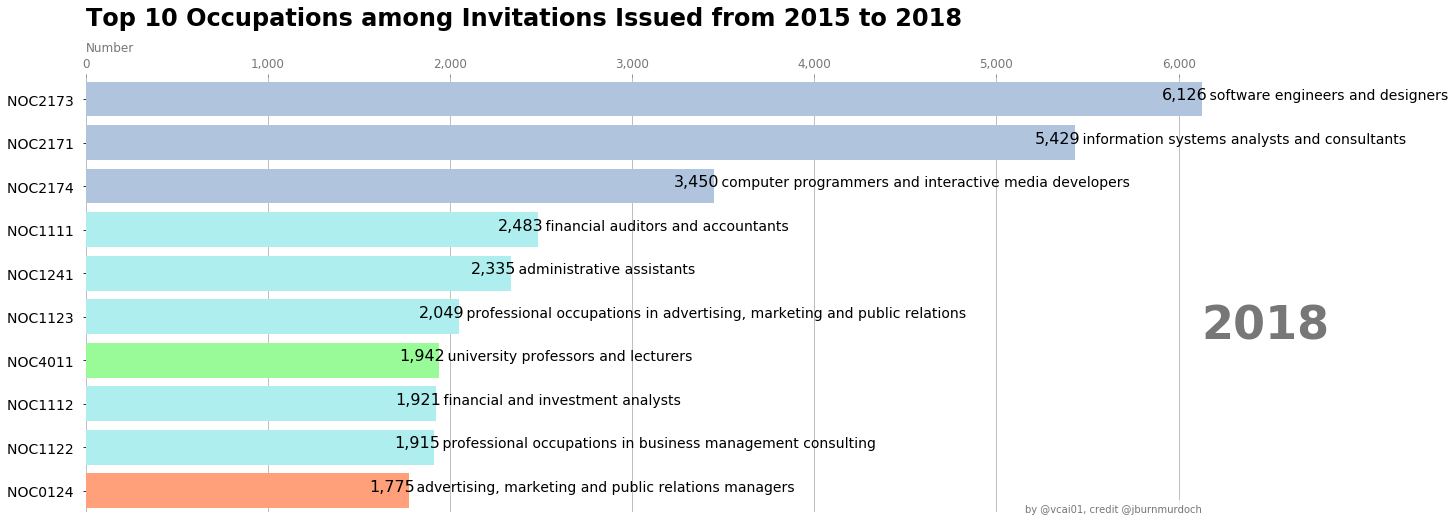

In [14]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 8))

def draw_barchart(year):
    df = NOC2015_2018[NOC2015_2018['Year'].eq(year)].sort_values(by = 'Number', ascending = True).tail(10)
    #group_lk = df.set_index('Occupation').to_dict()
    ax.clear()
    ax.barh(df['Occupation'], df['Number'], color = [color_dic[x] for x in df['Occupation']])
    dx = df['Number'].max() / 200
    for i, (number, occupation) in enumerate(zip(df['Number'], df['Occupation'])):
        ax.text(number-dx, i, '   '+occupation[8:], size = 14, weight = 400, ha = 'left')
        ax.text(number+dx, i, f'{number:,.0f}', size = 16, ha = 'right')
    # ... polished styles
    ax.text(1, 0.4, year, transform = ax.transAxes, color = '#777777', size = 46, ha = 'left', weight = 600)
    ax.text(0, 1.06, 'Number', transform = ax.transAxes, size = 12, color = '#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis = 'x', colors = '#777777', labelsize = 12)
    df['Occu'] = df['Occupation'].apply(lambda x: x[:8])
    ax.set_yticklabels(df['Occu'], fontsize = 14)            
    ax.margins(0, 0.01)
    ax.grid(which = 'major', axis = 'x', linestyle = '-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Top 10 Occupations among Invitations Issued from 2015 to 2018',
            transform = ax.transAxes, size = 24, weight = 600, ha = 'left')
    ax.text(1, 0, 'by @vcai01, credit @jburnmurdoch', transform = ax.transAxes, ha = 'right',
            color = '#777777', bbox = dict(facecolor='white', alpha = 0.8, edgecolor = 'white'))
    plt.box(False)

draw_barchart(2018)

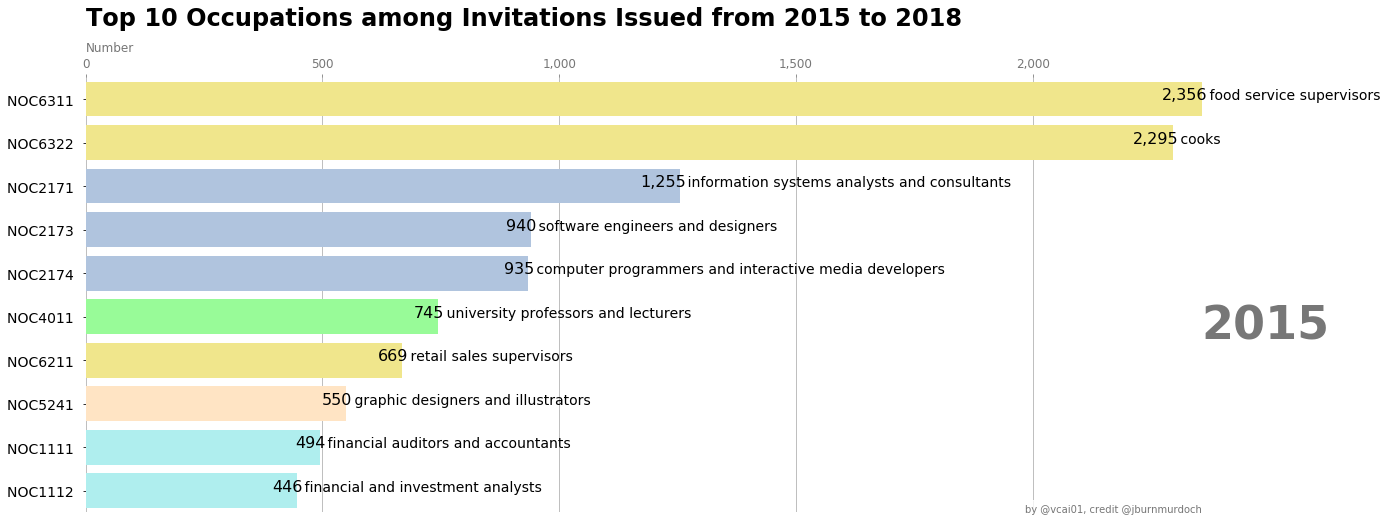

In [15]:
import matplotlib.animation as animation
from IPython.display import HTML, Image
import imageio

fig, ax = plt.subplots(figsize = (20, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames = range(2015, 2019), interval = 1200)

HTML(animator.to_jshtml()) 

animator.save("./Animator.gif", writer='pillow', fps = 1) #save gif

In [16]:
Image(url = './Animator.gif')